## Observations and Insights 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [75]:
# Checking the number of mice.
mouse_count = merge_df['Mouse ID'].unique()
len(mouse_count)

249

In [76]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mouse_id

array(['g989'], dtype=object)

In [77]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_df = merge_df[merge_df['Mouse ID'] == 'g989']
dup_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [78]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_df = merge_df[merge_df['Mouse ID'] != 'g989']
clean_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [79]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = clean_merge_df['Mouse ID'].unique()
len(mouse_count2)

248

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_summary = pd.DataFrame(clean_merge_df.groupby("Drug Regimen").count())

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_summary["Mean"] = pd.DataFrame(clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
regimen_summary["Median"] = pd.DataFrame(clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
regimen_summary["Variance"] = pd.DataFrame(clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
regimen_summary["Standard Deviation"] = pd.DataFrame(clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
regimen_summary["SEM"] = pd.DataFrame(clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

regimen_summary = regimen_summary[["Mouse ID", "Mean", "Median", "Variance", "Standard Deviation", "SEM"]]
regimen_summary = regimen_summary.rename(columns = {"Mouse ID" : "Trials"})
regimen_summary

,Trials,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
clean_merge_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

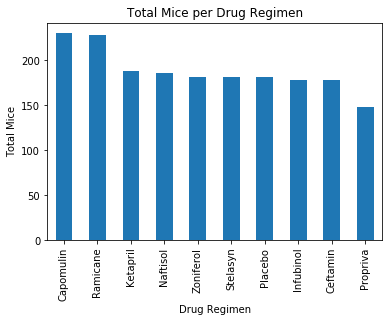

In [82]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
mouseplt = clean_merge_df["Drug Regimen"].value_counts()

mouseplt.plot(kind="bar",x="Drug Regimen", y="Value Counts",label="Total Mice per Drug Regimen")

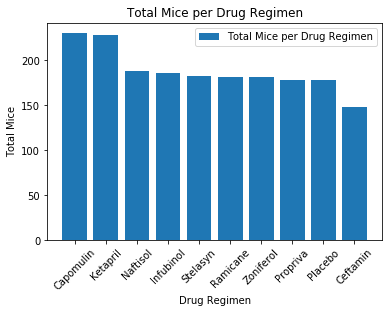

In [83]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
myplt = clean_merge_df["Drug Regimen"].unique()
myplt
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
plt.bar(myplt, height=(mouseplt), label="Total Mice per Drug Regimen")
plt.xticks(rotation=45)
plt.legend()
plt.show()


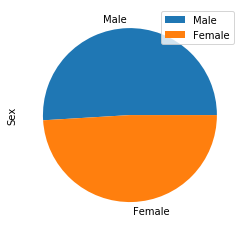

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female = clean_merge_df["Sex"].value_counts()
male_female.plot.pie()
plt.legend()
plt.show()

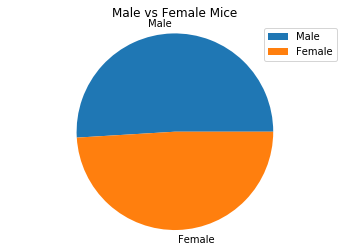

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(male_female, labels=["Male", "Female"], startangle=0)

# Plot title
plt.title("Male vs Female Mice")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Plot Legend
plt.legend()
# Save an image of our chart and print the final product to the screen
plt.show()


## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
sorted_df = clean_merge_df.sort_values(by='Timepoint', ascending=True)
sorted_df = sorted_df.drop_duplicates(subset=["Mouse ID"], keep= 'last')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
sorted_df = sorted_df.loc[(sorted_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol","Ceftamin"]))]
sorted_df.head(100)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1649,t573,0,45.000000,0,Ceftamin,Female,15,27
1613,x226,0,45.000000,0,Ceftamin,Male,23,28
1401,u153,0,45.000000,0,Ceftamin,Female,11,25
1467,b447,0,45.000000,0,Ceftamin,Male,2,30
1413,h531,5,47.784682,0,Ceftamin,Male,5,27
...,...,...,...,...,...,...,...,...
490,d251,45,37.311236,2,Ramicane,Female,8,19
500,j989,45,36.134852,1,Ramicane,Male,8,19
1764,j119,45,38.125164,1,Capomulin,Female,7,23
470,a411,45,38.407618,1,Ramicane,Male,3,22


In [87]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = sorted_df["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i, treatment in enumerate(treatments):
    filtered_df = sorted_df.loc[(sorted_df["Drug Regimen"] == treatment)]
    tumor_volume.append(filtered_df[["Mouse ID","Drug Regimen",'Tumor Volume (mm3)']])
    lowerq = filtered_df['Tumor Volume (mm3)'].quantile(0.25)
    upperq = filtered_df['Tumor Volume (mm3)'].quantile(0.75)
    IQR = upperq - lowerq
    lower_bound = round(lowerq - (1.5 * IQR),2)
    upper_bound = round(upperq + (1.5 * IQR),2)
    outlier = sorted_df.loc[(sorted_df['Tumor Volume (mm3)'] < lower_bound) | (sorted_df['Tumor Volume (mm3)'] > upper_bound) & sorted_df["Drug Regimen"] == treatment]
    print(f"Values below {lower_bound} and above {upper_bound} would be considered outliers for {treatment}")
outlier

Values below 25.36 and above 87.67 would be considered outliers for Ceftamin
Values below 17.91 and above 54.31 would be considered outliers for Ramicane
Values below 36.83 and above 82.74 would be considered outliers for Infubinol
Values below 20.7 and above 51.83 would be considered outliers for Capomulin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


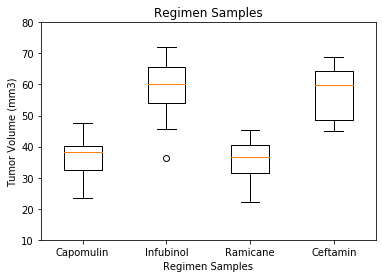

In [88]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Values per regimen
values_per_reg = pd.DataFrame(tumor_volume[0])
values_per_reg = values_per_reg.append(pd.DataFrame(tumor_volume[1]))
values_per_reg = values_per_reg.append(pd.DataFrame(tumor_volume[2]))
values_per_reg = values_per_reg.append(pd.DataFrame(tumor_volume[3]))

#Get a dataframe with only tumor volumne and drug regimen
drug_vs_tvol = values_per_reg.reset_index() 
drug_vs_tvol = values_per_reg[["Drug Regimen","Tumor Volume (mm3)"]] 


#Seperate drugs by regimen into series
capo_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Capomulin"]
capo_drug = capo_drug.reset_index()
capo_drug_series = capo_drug["Tumor Volume (mm3)"]
capo_drug_series = pd.Series(capo_drug_series)

inf_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Infubinol"]
inf_drug = inf_drug.reset_index()
inf_drug_series = inf_drug["Tumor Volume (mm3)"]
inf_drug_series = pd.Series(inf_drug_series)

rami_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Ramicane"]
rami_drug = rami_drug.reset_index()
rami_drug_series = rami_drug["Tumor Volume (mm3)"]
rami_drug_series = pd.Series(rami_drug_series)

ceft_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Ceftamin"]
ceft_drug = ceft_drug.reset_index()
ceft_drug_series = ceft_drug["Tumor Volume (mm3)"]
ceft_drug_series = pd.Series(ceft_drug_series)

#plot all series on same plot
data = [capo_drug_series, inf_drug_series,rami_drug_series,ceft_drug_series]
fig7, ax7 = plt.subplots()
ax7.set_title('Regimen Samples')
plt.xlabel("Regimen Samples")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(10,80)
ax7.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Capomulin','Infubinol', 'Ramicane', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

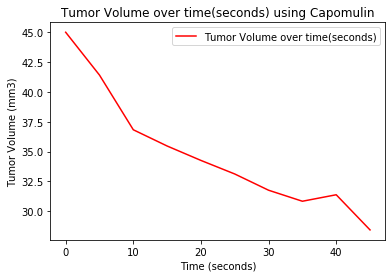

In [89]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mice = clean_merge_df.loc[clean_merge_df["Drug Regimen"] == "Capomulin"]
cap_mouse = clean_merge_df.loc[clean_merge_df["Mouse ID"] == "m601"] 
plt.title("Tumor Volume over time(seconds) using Capomulin")
plt.xlabel("Time (seconds)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"] ,color="red", label="Tumor Volume over time(seconds)" )
plt.legend()
plt.show()

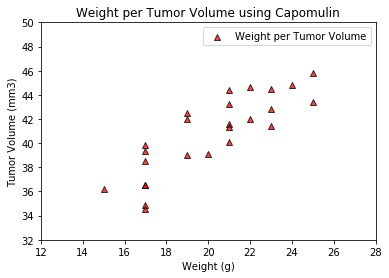

In [90]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_tumor_vol = cap_mice.groupby("Mouse ID").mean()

x_axis = average_tumor_vol["Weight (g)"]
y_axis = average_tumor_vol["Tumor Volume (mm3)"]

plt.title("Weight per Tumor Volume using Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(32,50)
plt.xlim(12,28)

plt.scatter(x_axis, y_axis, marker="^", facecolors="red", edgecolors="black",  alpha=0.75, label="Weight per Tumor Volume")
plt.legend()
plt.plot()
plt.show()

## Correlation and Regression

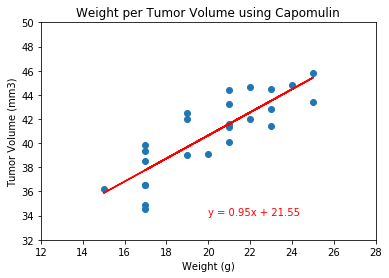

In [91]:
# Calculate the correlation coefficient and linear regression model 
corr_coef = st.pearsonr(x_axis, y_axis)
round_corr = round(corr_coef[0],3)
round_corr
# Linear Regression Modeling
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.title("Weight per Tumor Volume using Capomulin")

plt.annotate(line_eq,(20,34),fontsize=10,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylim(32,50)
plt.xlim(12,28)
plt.show()
